# Exploratory Data Analysis
Import all the necessary libraries.

In [1]:
import pandas as pd
import glob # used for the * thing in a general filepath
import timeit
import seaborn as sns

%matplotlib inline

## 1. House Sales 1995-2020

In [45]:
df = pd.read_csv('data/pp-2020.csv', header=None)

In [52]:
df.head(1)

,Sale_ID,Price(£),Transfer_Date,Postcode,Property_Type,New_Build,Freehold,PAON,SAON,Street,Locality,Town/City,District,County,Record_Status,Unknown
0,{9FF0D969-FE3D-11ED-E053-6C04A8C06383},309000,2020-02-07 00:00,NR29 4BQ,D,N,F,HILL COTTAGE,NaN,OLD CHAPEL ROAD,WINTERTON ON SEA,GREAT YARMOUTH,GREAT YARMOUTH,NORFOLK,A,A


In [47]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

In [51]:
df.columns = ['Sale_ID', 'Price(£)', 'Transfer_Date', 'Postcode', 'Property_Type',
              'New_Build', 'Freehold', 'PAON', 'SAON', 'Street',
              'Locality', 'Town/City', 'District', 'County',  'Record_Status',
              'Unknown']

In [49]:
df.columns

Index(['Sale_ID', 'Price(£)', 'Transfer_Date', 'Postcode', 'Property_Type',
       'New_Build', 'Freehold', 'PAON', 'SAON', 'Street', 'Neighbourhood',
       'Town/City', 'District', 'Region', 'Record_Status', 'Unknown'],
      dtype='object')

## 2. Postcode detail

In [2]:
sample_postcodes = pd.read_csv('data/National_Statistics_Postcode_Lookup_UK.csv')

In [5]:
sample_postcodes[sample_postcodes['Postcode 1'] == 'NN112NP']

,Postcode 1,Postcode 2,Postcode 3,Date Introduced,User Type,Easting,Northing,Positional Quality,County Code,County Name,...,Output Area Classification Code,Output Area Classification Name,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location,Socrata ID,Lower Layer Super Output Area (LSOA),Ward
923070,NN112NP,NN11 2NP,NN11 2NP,10-2014,0,457916,264524,1,E10000021,Northamptonshire,...,5A1,Urbanites;Urban professionals and families;Whi...,-1.152576,52.275824,Postcode Level,06/03/2020,"(52.275824, -1.152576)",1066842,NaN,NaN


In [10]:
sample_postcodes.head(1)

,Postcode 1,Postcode 2,Postcode 3,Date Introduced,User Type,Easting,Northing,Positional Quality,County Code,County Name,...,Output Area Classification Code,Output Area Classification Name,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location,Socrata ID,Lower Layer Super Output Area (LSOA),Ward
0,SL2 1NX,SL2 1NX,SL2 1NX,01-1980,0,496871,181795,1,E99999999,(pseudo) England (UA/MD/LB),...,4B1,Multicultural metropolitans;Challenged Asian t...,-0.605005,51.526769,Postcode Level,06/03/2020,"(51.526769, -0.605005)",1417572,NaN,NaN


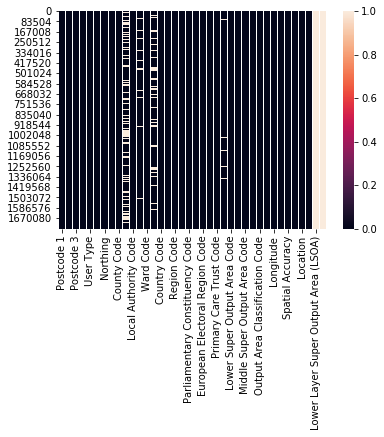

In [4]:
sns.heatmap(sample_postcodes.isna())

----

### 2.1 Extracting the area classification data - ALL THIS IS NEW

In [69]:
len(list(sample_postcodes['Output Area Classification Name'].unique()))

76

In [14]:
area_classes = sample_postcodes['Output Area Classification Name']

'Hard-pressed living;Challenged terraced workers;Deprived blue-collar terraces'

In [46]:
unique_area_classes = area_classes[0].split(';')

num_unique_classes = []

for i in range(1,1000):
    entry = area_classes[i]
    
    entry = entry.split(';')
    for item in entry:
        if item not in unique_area_classes:
            unique_area_classes.append(item)
    
    num_unique_classes.append(len(unique_area_classes))

print('Have {} distinct area classifcations'.format(len(unique_area_classes)))

Have 110 distinct area classifcations


In [47]:
foobar = pd.DataFrame.from_dict({'num_unique_classes':num_unique_classes})

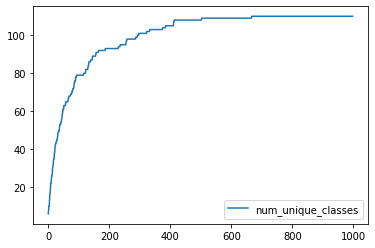

In [48]:
foobar.plot()

Can reasonably conclude that the number of unique area classifications is 110, given by the maximum number on this plot.

Now want to create a dataframe that.

In [54]:
test = pd.DataFrame(area_classes)['Output Area Classification Name'].str.split(';', expand=True)

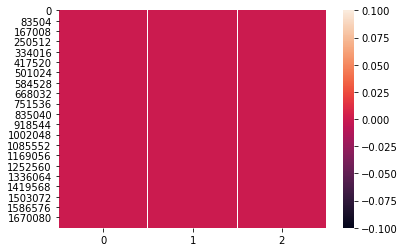

In [55]:
sns.heatmap(test.isna())

In [56]:
test.head()

,0,1,2
0,Multicultural metropolitans,Challenged Asian terraces,Asian terraces and flats
1,Hard-pressed living,Challenged terraced workers,Deprived blue-collar terraces
2,Hard-pressed living,Hard pressed ageing workers,Ageing rural industry workers
3,Multicultural metropolitans,Asian traits,Inner city ethnic mix
4,Multicultural metropolitans,Asian traits,Inner city ethnic mix


In [74]:
my_personal_test = list(test[0].unique())
my_proof = list(test[1].unique())
my_other_proof = list(test[2].unique())

for item in my_personal_test:
    if item in my_proof or item in my_other_proof:
        print('You were wrong')

for item in my_proof:
    if item in my_other_proof:
        print('You were wrong')

In [70]:
list(test[0].unique())

['Multicultural metropolitans',
 'Hard-pressed living',
 'Urbanites',
 'Suburbanites',
 'Rural residents',
 'Constrained city dwellers',
 'Ethnicity central',
 'Cosmopolitans']

In [71]:
test[1].unique()

array(['Challenged Asian terraces', 'Challenged terraced workers',
       'Hard pressed ageing workers', 'Asian traits',
       'Ageing urban living', 'Suburban achievers', 'Farming communities',
       'Semi-detached suburbia', 'Rural tenants',
       'Urban professionals and families', 'Challenged diversity',
       'Ageing city dwellers', 'Aspirational techies',
       'Inner city students', 'Rented family living', 'White communities',
       'Aspiring and affluent', 'Students around campus',
       'Endeavouring ethnic mix', 'Ethnic family life',
       'Industrious communities', 'Migration and churn',
       'Constrained flat dwellers', 'Ageing rural dwellers',
       'Comfortable cosmopolitan', 'Ethnic dynamics'], dtype=object)

In [72]:
test[2].unique()

array(['Asian terraces and flats', 'Deprived blue-collar terraces',
       'Ageing rural industry workers', 'Inner city ethnic mix',
       'Communal retirement', 'Indian tech achievers',
       'Ageing in suburbia', 'Rural workers and families',
       'Semi-detached ageing', 'Rural life', 'White professionals',
       'Agricultural communities', 'Multi-ethnic hardship',
       'White suburban communities',
       'Multi-ethnic professionals with families',
       'Ageing communities and families', 'Ageing rural flat tenants',
       'New EU tech workers', 'Students and commuters',
       'Transitional Eastern European neighbourhood',
       'Achieving minorities', 'Detached retirement living',
       'Older farming communities', 'Renting hard-pressed workers',
       'Self-sufficient retirement', 'Private renting new arrivals',
       'Rural white-collar workers', 'Challenged transitionaries',
       'Hard pressed rented terraces',
       'Multicultural student neighbourhood',
      

## 3. UK Economic Data

In [28]:
macro_data = pd.read_csv('data/world_bank_uk_wide/API_GBR_DS2_en_csv_v2_999709.csv', skiprows=3)

In [29]:
macro_data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,United Kingdom,GBR,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.192049,3.756778,3.31287,4.791072,4.903023,4.610518,5.549068,NaN,NaN,NaN


In [31]:
macro_data.shape

(1429, 65)

In [32]:
macro_data = macro_data.drop(labels=macro_data.columns[4:39], axis=1)

In [33]:
macro_data = macro_data.drop(labels=macro_data.columns[-3:], axis=1)

In [34]:
macro_data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,United Kingdom,GBR,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.GN.ZS,5.426979,5.76317,7.489882,8.086991,5.56731,5.805897,...,4.370723,2.183413,4.264821,5.192049,3.756778,3.31287,4.791072,4.903023,4.610518,5.549068


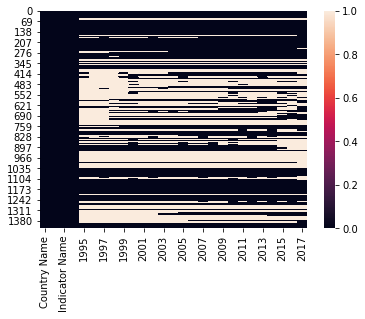

In [35]:
sns.heatmap(macro_data.isna())

In [36]:
macro_data = macro_data.dropna(how='any')

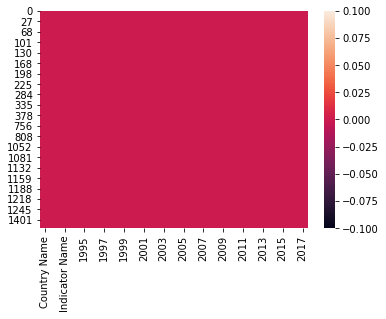

In [37]:
sns.heatmap(macro_data.isna())

In [42]:
macro_data.shape

(562, 27)

In [44]:
list(macro_data['Indicator Name'])

['Adjusted net savings, excluding particulate emission damage (% of GNI)',
 'Adjusted net savings, excluding particulate emission damage (current US$)',
 'Adjusted net savings, including particulate emission damage (% of GNI)',
 'Adjusted net savings, including particulate emission damage (current US$)',
 'Adjusted net national income per capita (annual % growth)',
 'Adjusted net national income per capita (constant 2010 US$)',
 'Adjusted net national income per capita (current US$)',
 'Adjusted net national income (annual % growth)',
 'Adjusted net national income (constant 2010 US$)',
 'Adjusted net national income (current US$)',
 'Adjusted savings: net national savings (% of GNI)',
 'Adjusted savings: net national savings (current US$)',
 'Adjusted savings: gross savings (% of GNI)',
 'Adjusted savings: natural resources depletion (% of GNI)',
 'Adjusted savings: particulate emission damage (% of GNI)',
 'Adjusted savings: particulate emission damage (current US$)',
 'Adjusted savi

### 3.1 Tom explores using an API just the for the sake of using an API

In [2]:
import requests
import json

In [3]:
url = 'http://landregistry.data.gov.uk/data/ukhpi/region/england-and-wales'

In [4]:
request = requests.get(url)
request.text

'<!DOCTYPE html><html>\n   <head>\n      <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n      <title>Search Results</title>\n      <link rel="shortcut icon" href="/lda-assets/images/datagovuk_favicon.png" type="image/x-icon">\n      <link rel="start" href="https://landregistry.data.gov.uk/data/ukhpi/region/england-and-wales.html?_page=0">\n      <link rel="next" href="https://landregistry.data.gov.uk/data/ukhpi/region/england-and-wales.html?_page=1">\n      <link rel="alternate" href="https://landregistry.data.gov.uk/data/ukhpi/region/england-and-wales.csv" type="text/csv">\n      <link rel="alternate" href="https://landregistry.data.gov.uk/data/ukhpi/region/england-and-wales.json" type="application/json">\n      <link rel="alternate" href="https://landregistry.data.gov.uk/data/ukhpi/region/england-and-wales.rdf" type="application/rdf+xml">\n      <link rel="alternate" href="https://landregistry.data.gov.uk/data/ukhpi/region/england-and-wales.text" type="text/plai